In [ ]:
import pandas as pd
import numpy as np

# 건설기성액
file_path1 = '/content/drive/MyDrive/201101-202410발주자별_건설기성액_경상__20241206152930.csv'  # 파일 경로 지정
df1 = pd.read_csv(file_path1,encoding='euc-kr')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      166 non-null    float64
 1   기성총액    166 non-null    int64  
 2   공공기관    166 non-null    int64  
 3   민간기관    166 non-null    int64  
 4   민자      166 non-null    int64  
 5   국내외국기관  166 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 7.9 KB


In [ ]:
df1.head()

,시점,기성총액,공공기관,민간기관,민자,국내외국기관
0,2024.10,13240131,2282714,10658980,292169,6268
1,2024.09,12882554,2302208,10227958,344103,8285
2,2024.08,12969124,2047505,10656931,257311,7377
3,2024.07,13248936,2086243,10906541,248796,7356
4,2024.06,15728778,3193938,12148049,371885,14906


In [ ]:
# 나머지 컬럼들을 float 형식으로 변환 ('Date'를 제외한 나머지 컬럼)
float_columns = df1.columns[1:]
df1[float_columns] = df1[float_columns].apply(pd.to_numeric, errors='coerce', downcast='float')

In [ ]:
# 컬럼 이름을 영어로 변경
df1 = df1.rename(columns={'시점':'Date',
                          "기성총액": "Const_Comp",
                          "공공기관": "Pub_Comp",
                          "민간기관": "Priv_Comp"})
# 'Date' 컬럼을 문자열로 변환
df1['Date'] = df1['Date'].astype(str)

# 2024.1 -> 2024.10 으로
df1['Date'] = df1['Date'].apply(lambda x: x.split('.')[0] + '.10' if len(x.split('.')) > 1 and x.split('.')[1] == '1' else x)

# 'Date' 컬럼을 datetime 형식으로 변환
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y.%m', errors='coerce')
# 필요없는 열 삭제
df1 = df1.drop(df1.columns[4:], axis=1)

# 결과 출력
print(df1.head())
print(df1.info())

        Date  Const_Comp   Pub_Comp   Priv_Comp
0 2024-10-01  13240131.0  2282714.0  10658980.0
1 2024-09-01  12882554.0  2302208.0  10227958.0
2 2024-08-01  12969124.0  2047505.0  10656931.0
3 2024-07-01  13248936.0  2086243.0  10906541.0
4 2024-06-01  15728778.0  3193938.0  12148049.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        166 non-null    datetime64[ns]
 1   Const_Comp  166 non-null    float64       
 2   Pub_Comp    166 non-null    float32       
 3   Priv_Comp   166 non-null    float32       
dtypes: datetime64[ns](1), float32(2), float64(1)
memory usage: 4.0 KB
None


In [ ]:
# 결측치 확인
df1.isnull().sum()

,0
Date,0
Const_Comp,0
Pub_Comp,0
Priv_Comp,0


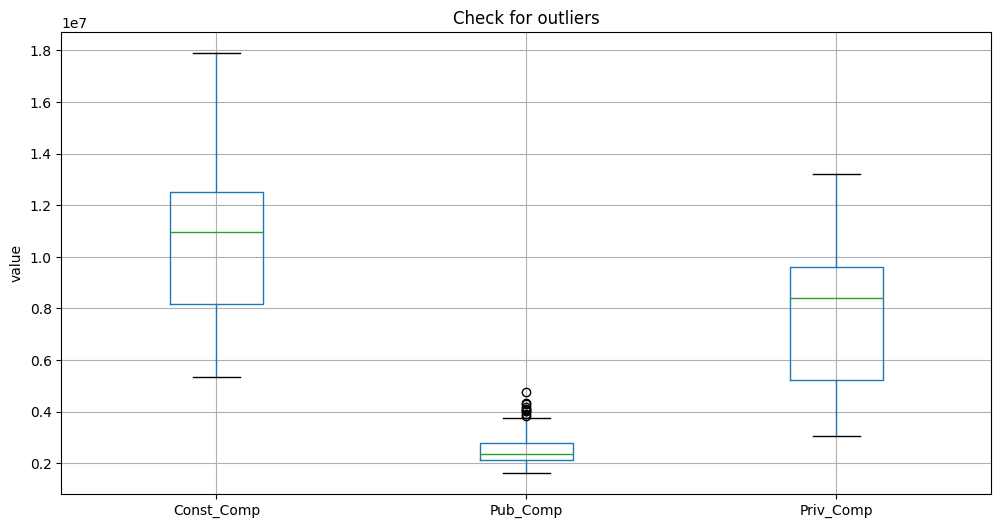

In [ ]:
import matplotlib.pyplot as plt

# 이상치 그래프 그리기
plt.figure(figsize=(12, 6))
df1.drop(columns=["Date"]).boxplot()
plt.title("Check for outliers")
plt.ylabel("value")
plt.show()

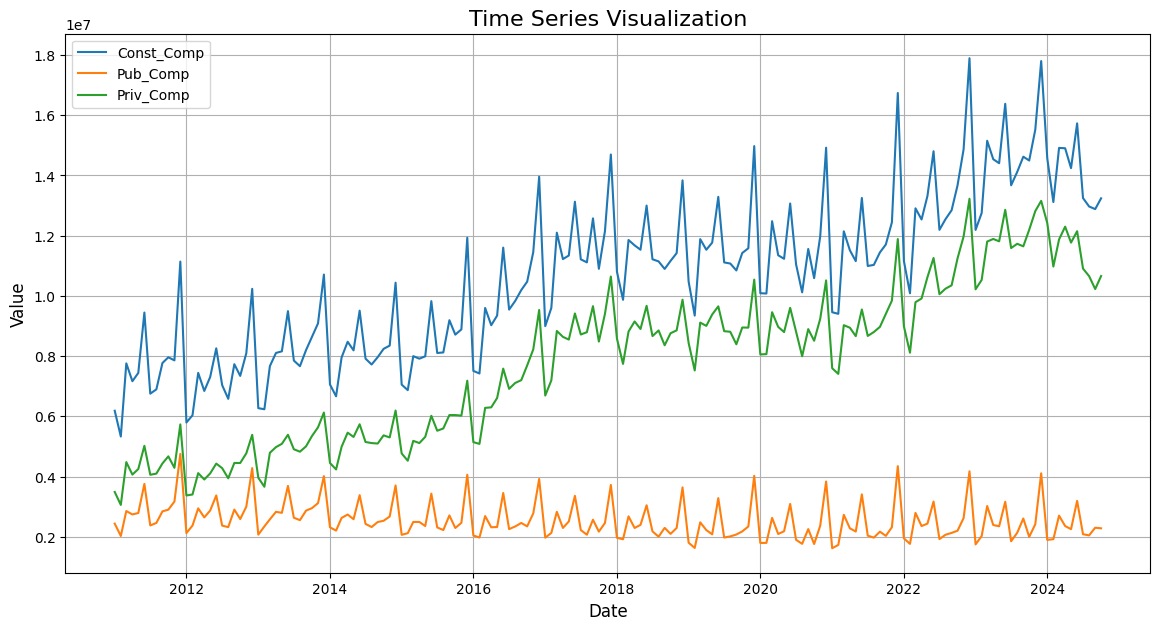

In [ ]:
# 그래프 시각화
plt.figure(figsize=(14, 7))

# 각 컬럼을 Date를 기준으로 선 그래프로 표시
for column in df1.columns[1:]:  # Date를 제외한 나머지 컬럼
    plt.plot(df1['Date'], df1[column], label=column)

# 그래프 제목 및 축 설정
plt.title('Time Series Visualization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()


In [ ]:
# 데이터 불러오기
file_path2 = '/content/drive/MyDrive/201101-202410발주자_공종별_건설수주액_경상__20241206152309.csv'  # 파일 경로 지정
df2 = pd.read_csv(file_path2, encoding='euc-kr')

# 첫 번째행 삭제
df2 = df2.drop([0]).reset_index(drop=True)

# 결과 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        166 non-null    object
 1   수주총액      166 non-null    object
 2   수주총액.1    166 non-null    object
 3   수주총액.2    166 non-null    object
 4   공공부문      166 non-null    object
 5   공공부문.1    166 non-null    object
 6   공공부문.2    166 non-null    object
 7   민간부문      166 non-null    object
 8   민간부문.1    166 non-null    object
 9   민간부문.2    166 non-null    object
 10  국내외국기관    166 non-null    object
 11  국내외국기관.1  166 non-null    object
 12  국내외국기관.2  166 non-null    object
 13  민자        166 non-null    object
 14  민자.1      166 non-null    object
 15  민자.2      166 non-null    object
dtypes: object(16)
memory usage: 20.9+ KB


In [ ]:
df2.head()

,시점,수주총액,수주총액.1,수주총액.2,공공부문,공공부문.1,공공부문.2,민간부문,민간부문.1,민간부문.2,국내외국기관,국내외국기관.1,국내외국기관.2,민자,민자.1,민자.2
0,2024.1,12556526,8876958,3679568,3885806,1704726,2181080,8265657,7163207,1102450,0,0,0,405063,9025,396038
1,2024.09,15532396,12343999,3188397,3663454,1505359,2158095,11418775,10806701,612074,27225,24419,2806,422942,7520,415422
2,2024.08,10386756,7575230,2811526,1331790,417576,914214,8039453,7098907,940546,25041,24486,555,990472,34261,956211
3,2024.07,14341510,8715184,5626326,2782514,724167,2058347,11527525,7961033,3566492,1020,889,131,30451,29095,1356
4,2024.06,24219700,14711865,9507835,6185019,1283134,4901885,16325973,13361880,2964093,95654,3362,92292,1613054,63489,1549565


In [ ]:
# 필요없는 열 삭제
df2 = df2.drop(df2.columns[10:], axis=1)
# 2, 5, 8열 삭제
df2 = df2.drop(df2.columns[[2,3,4, 7]], axis=1)
# 나머지 컬럼들을 float 형식으로 변환 ('Date'를 제외한 나머지 컬럼)
float_columns = df2.columns[1:]  # 'Date' 제외한 나머지
# 나머지 컬럼들을 float64 형식으로 변환
df2[float_columns] = df2[float_columns].apply(pd.to_numeric, errors='coerce', downcast='float')
# 컬럼 이름 변경 (1은 'Construction', 2는 'Civil'로)
df2 = df2.rename(columns={'시점':'Date',
                          '수주총액': 'Total_Ord',
                          '공공부문.1':'Pub_Const_Ord',
                          '공공부문.2':'Pub_Civil_Ord',
                          '민간부문.1':'Priv_Const_Ord',
                          '민간부문.2':'Priv_Civil_Ord'})
# 'Date' 컬럼을 문자열로 변환
df2['Date'] = df2['Date'].astype(str)

# 2024.1 -> 2024.10 으로 (필요한 경우에만)
df2['Date'] = df2['Date'].apply(lambda x: x.split('.')[0] + '.10' if len(x.split('.')) > 1 and x.split('.')[1] == '1' else x)

# 'Date' 컬럼을 datetime 형식으로 변환
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y.%m', errors='coerce')


print(df2.head())
print(df2.info())

        Date   Total_Ord  Pub_Const_Ord  Pub_Civil_Ord  Priv_Const_Ord  \
0 2024-10-01  12556526.0      1704726.0      2181080.0       7163207.0   
1 2024-09-01  15532396.0      1505359.0      2158095.0      10806701.0   
2 2024-08-01  10386756.0       417576.0       914214.0       7098907.0   
3 2024-07-01  14341510.0       724167.0      2058347.0       7961033.0   
4 2024-06-01  24219700.0      1283134.0      4901885.0      13361880.0   

   Priv_Civil_Ord  
0       1102450.0  
1        612074.0  
2        940546.0  
3       3566492.0  
4       2964093.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            166 non-null    datetime64[ns]
 1   Total_Ord       166 non-null    float64       
 2   Pub_Const_Ord   166 non-null    float32       
 3   Pub_Civil_Ord   166 non-null    float32       
 4   Priv_Const_Ord

In [ ]:
# 결측치 확인
df2.isnull().sum()

,0
Date,0
Total_Ord,0
Pub_Const_Ord,0
Pub_Civil_Ord,0
Priv_Const_Ord,0
Priv_Civil_Ord,0


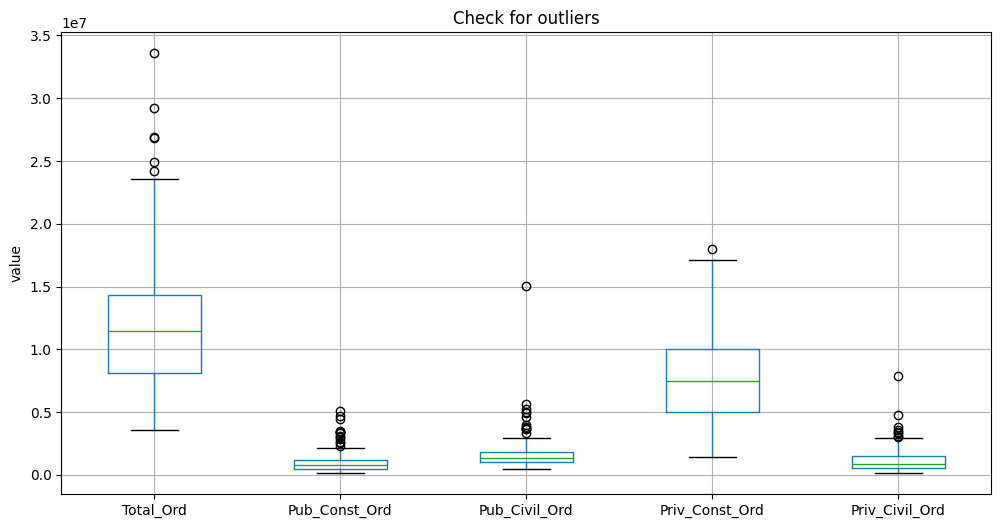

In [ ]:
# 이상치 그래프 그리기
plt.figure(figsize=(12, 6))
df2.drop(columns=["Date"]).boxplot()
plt.title("Check for outliers")
plt.ylabel("value")
plt.show()

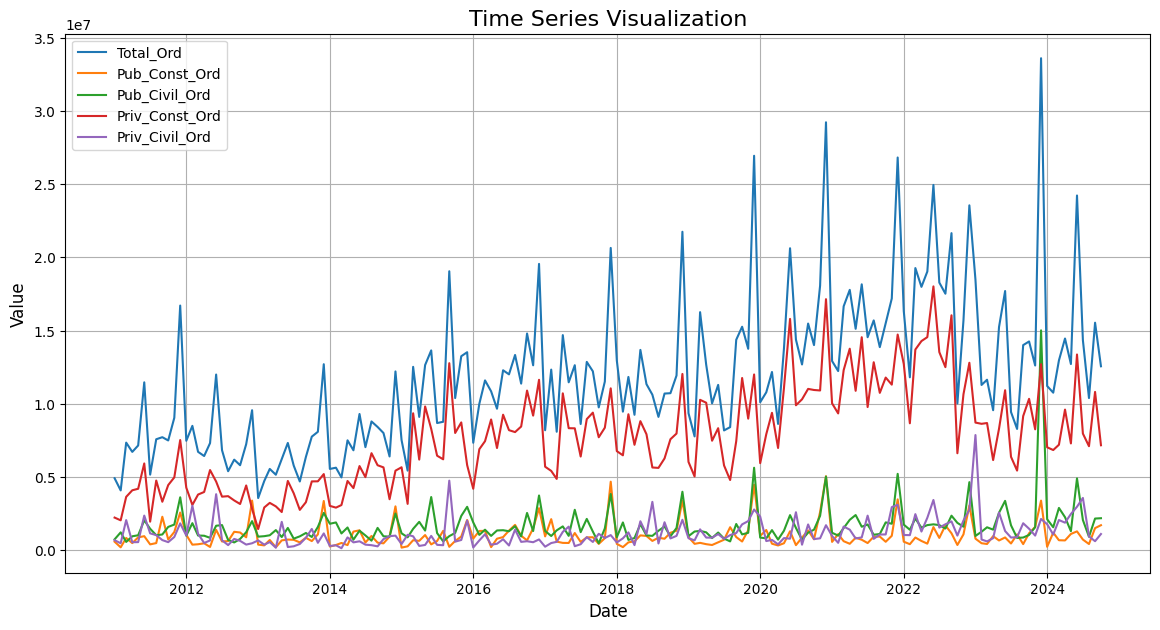

In [ ]:
# 그래프 시각화
plt.figure(figsize=(14, 7))

# 각 컬럼을 Date를 기준으로 선 그래프로 표시
for column in df2.columns[1:]:  # Date를 제외한 나머지 컬럼
    plt.plot(df2['Date'], df2[column], label=column)

# 그래프 제목 및 축 설정
plt.title('Time Series Visualization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
# 철강 생산량
file_path3 = '/content/drive/MyDrive/201101-202409철강_생산량_20241207005821.csv'  # 파일 경로 지정
df3 = pd.read_csv(file_path3,encoding='euc-kr')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   시점       166 non-null    object
 1   조강       166 non-null    object
 2   조강.1     166 non-null    object
 3   조강.2     166 non-null    object
 4   철강재      166 non-null    object
 5   형강       166 non-null    object
 6   H형강      166 non-null    object
 7   봉강       166 non-null    object
 8   철근       166 non-null    object
 9   선재       166 non-null    object
 10  중후판      166 non-null    object
 11  열연강판     166 non-null    object
 12  냉연강판     166 non-null    object
 13  용융아연도강판  166 non-null    object
 14  전기아연도강판  166 non-null    object
 15  컬러강판     166 non-null    object
 16  석도강판     166 non-null    object
 17  강관       166 non-null    object
dtypes: object(18)
memory usage: 23.5+ KB


In [ ]:
df3.head()

,시점,조강,조강.1,조강.2,철강재,형강,H형강,봉강,철근,선재,중후판,열연강판,냉연강판,용융아연도강판,전기아연도강판,컬러강판,석도강판,강관
0,시점,소계,전로강,전기로강,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계
1,2011.01,5665,3359,2306,6761,389,238,297,798,218,1043,1529,848,479,169,176,57,400
2,2011.02,5063,3168,1895,6085,283,175,237,616,204,909,1591,748,382,154,163,47,357
3,2011.03,5835,3501,2334,7186,419,283,355,748,245,965,1715,862,490,176,198,59,487
4,2011.04,5886,3595,2291,7140,420,272,313,711,245,1015,1742,829,494,166,200,55,461


In [ ]:
# 모든 수치형 데이터를 float로 변환
for col in df3.columns[1:]:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')
# 가장 많이 쓰이는 철근 형강 강관 빼고 열 삭제
df3 = df3.drop(df3.columns[[1,2,3,4,7,9,10,11,12,13,14,15,16]], axis=1)
df3 = df3.drop(index=0)  # 1행(인덱스 0)을 삭제
df3.reset_index(drop=True, inplace=True)
# 컬럼 이름을 영어로 변경
df3 = df3.rename(columns={'시점':'Date',
                          '형강': 'Sect',
                          'H형강': 'HBeam',
                          '철근': 'Rebar',
                          '강관': 'Pipe'})

In [ ]:
# 'Date' 컬럼을 문자열로 변환
df3['Date'] = df3['Date'].astype(str)

# 2024.1 -> 2024.10 으로
df3['Date'] = df3['Date'].apply(lambda x: x.split('.')[0] + '.10' if len(x.split('.')) > 1 and x.split('.')[1] == '1' else x)

# 'Date' 컬럼을 datetime 형식으로 변환
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y.%m', errors='coerce')

# 결과 출력
print(df3.head())
print(df3.info())

        Date   Sect  HBeam  Rebar   Pipe
0 2011-01-01  389.0  238.0  798.0  400.0
1 2011-02-01  283.0  175.0  616.0  357.0
2 2011-03-01  419.0  283.0  748.0  487.0
3 2011-04-01  420.0  272.0  711.0  461.0
4 2011-05-01  397.0  264.0  718.0  465.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    165 non-null    datetime64[ns]
 1   Sect    165 non-null    float64       
 2   HBeam   165 non-null    float64       
 3   Rebar   165 non-null    float64       
 4   Pipe    165 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 6.6 KB
None


In [ ]:
# 결측치 확인
df3.isnull().sum()

,0
Date,0
Sect,0
HBeam,0
Rebar,0
Pipe,0


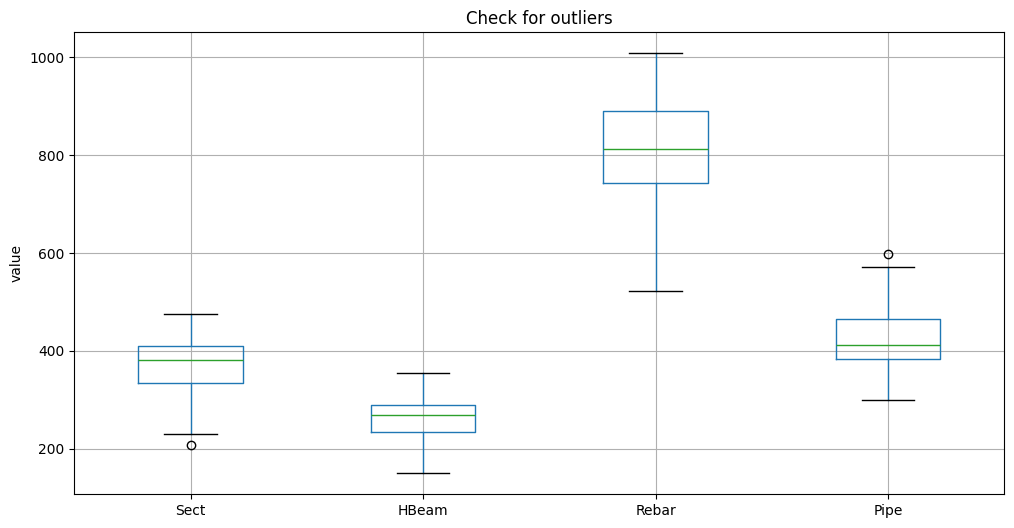

In [ ]:
# 이상치 그래프 그리기
plt.figure(figsize=(12, 6))
df3.drop(columns=["Date"]).boxplot()
plt.title("Check for outliers")
plt.ylabel("value")
plt.show()

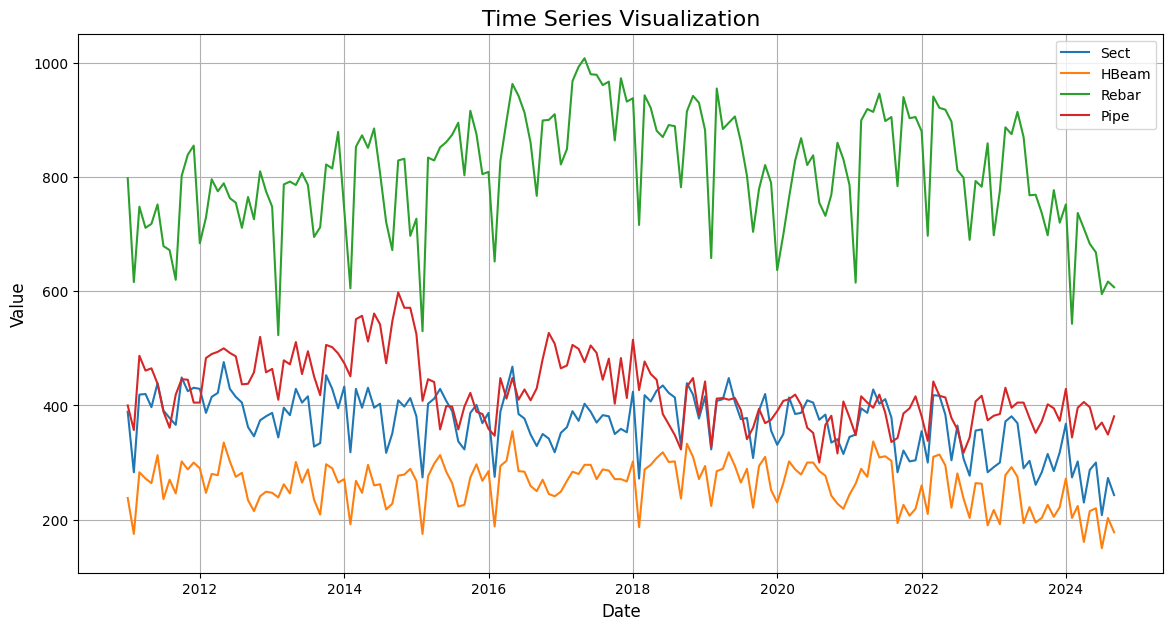

In [ ]:
# 그래프 시각화
plt.figure(figsize=(14, 7))

# 각 컬럼을 Date를 기준으로 선 그래프로 표시
for column in df3.columns[1:]:  # Date를 제외한 나머지 컬럼
    plt.plot(df3['Date'], df3[column], label=column)

# 그래프 제목 및 축 설정
plt.title('Time Series Visualization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()


In [ ]:
# 아파트 매매가격지수
file_path4 = '/content/drive/MyDrive/201101-202410아파트_매매_실거래가격지수_20241206234559.csv'
df4 = pd.read_csv(file_path4,encoding='euc-kr')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      165 non-null    float64
 1   전국      165 non-null    float64
dtypes: float64(2)
memory usage: 2.7 KB


In [ ]:
df4.head()

,시점,전국
0,2011.01,80.5
1,2011.02,81.8
2,2011.03,82.8
3,2011.04,83.3
4,2011.05,83.6


In [ ]:
# 컬럼 이름을 영어로 변경
df4.columns = ['Date','Apartment price index']

# 'Date' 컬럼을 문자열로 변환
df4['Date'] = df4['Date'].astype(str)

# 2024.1 -> 2024.10 으로 (필요한 경우에만)
df4['Date'] = df4['Date'].apply(lambda x: x.split('.')[0] + '.10' if len(x.split('.')) > 1 and x.split('.')[1] == '1' else x)

# 'Date' 컬럼을 datetime 형식으로 변환
df4['Date'] = pd.to_datetime(df4['Date'], format='%Y.%m', errors='coerce')


print(df4.head())
print(df4.info())

        Date  Apartment price index
0 2011-01-01                   80.5
1 2011-02-01                   81.8
2 2011-03-01                   82.8
3 2011-04-01                   83.3
4 2011-05-01                   83.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   165 non-null    datetime64[ns]
 1   Apartment price index  165 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB
None


In [ ]:
df4.isnull().sum()

,0
Date,0
Apartment price index,0


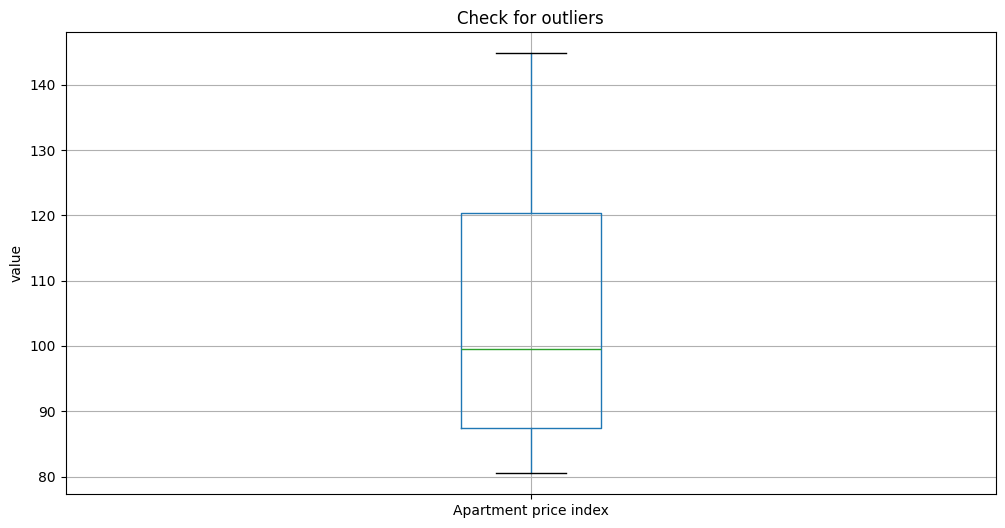

In [ ]:
# 이상치 그래프 그리기
plt.figure(figsize=(12, 6))
df4.drop(columns=["Date"]).boxplot()
plt.title("Check for outliers")
plt.ylabel("value")
plt.show()

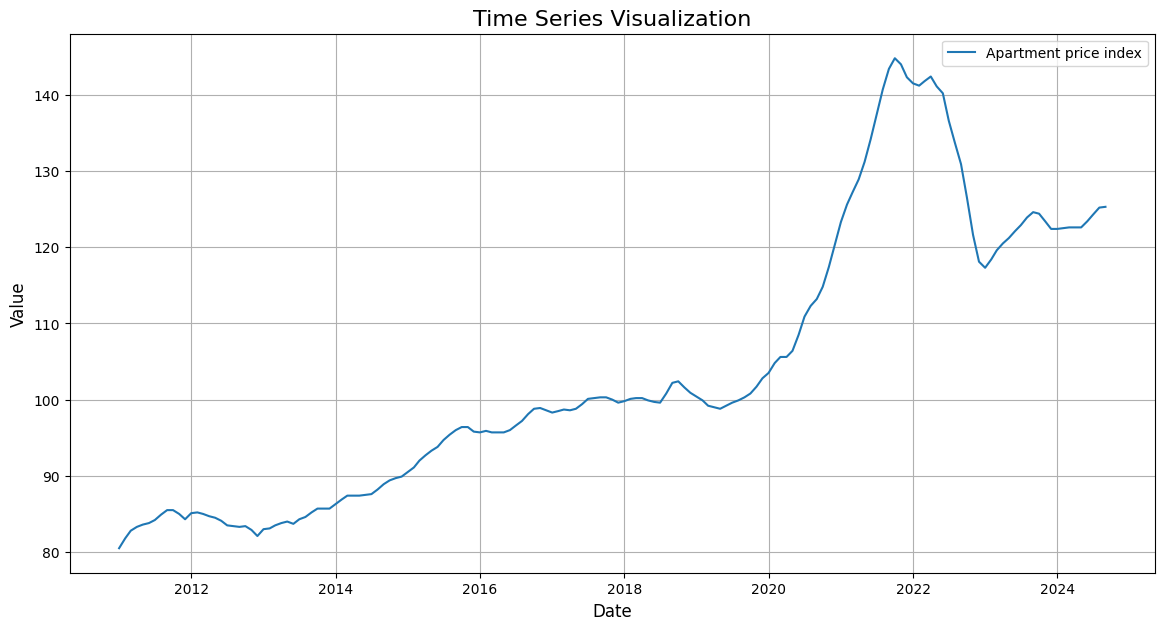

In [ ]:
# 그래프 시각화
plt.figure(figsize=(14, 7))

# 단일 컬럼을 선 그래프로 표시
plt.plot(df4['Date'], df4[df4.columns[1]], label=df4.columns[1])

# 그래프 제목 및 축 설정
plt.title('Time Series Visualization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
# 주택 매매가격지수
file_path5 = '/content/drive/MyDrive/201101-202410 주택_매매가격지수_20241206234145.csv'  # 파일 경로 지정
df5 = pd.read_csv(file_path5,encoding='euc-kr')

# 컬럼 이름을 영어로 변경
df5.columns = ['Date','House price index']
# 'Date' 컬럼을 문자열로 변환
df5['Date'] = df5['Date'].astype(str)

# 2024.1 -> 2024.10 으로 (필요한 경우에만)
df5['Date'] = df5['Date'].apply(lambda x: x.split('.')[0] + '.10' if len(x.split('.')) > 1 and x.split('.')[1] == '1' else x)

# 'Date' 컬럼을 datetime 형식으로 변환
df5['Date'] = pd.to_datetime(df5['Date'], format='%Y.%m', errors='coerce')

print(df5.head())
print(df5.info())

        Date  House price index
0 2024-10-01               96.4
1 2024-09-01               96.3
2 2024-08-01               96.1
3 2024-07-01               95.9
4 2024-06-01               95.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               166 non-null    datetime64[ns]
 1   House price index  166 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB
None


In [ ]:
df5.isnull().sum()

,0
Date,0
House price index,0


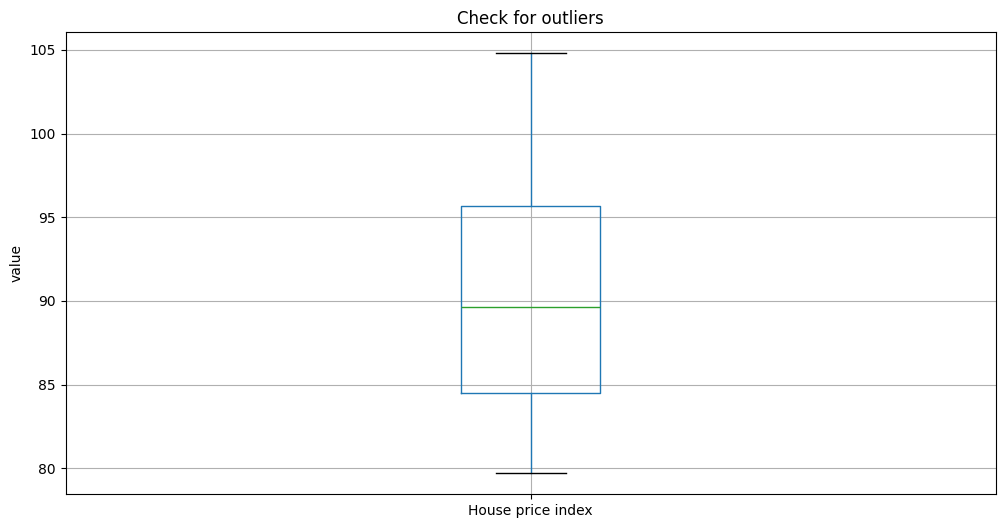

In [ ]:
# 이상치 그래프 그리기
plt.figure(figsize=(12, 6))
df5.drop(columns=["Date"]).boxplot()
plt.title("Check for outliers")
plt.ylabel("value")
plt.show()

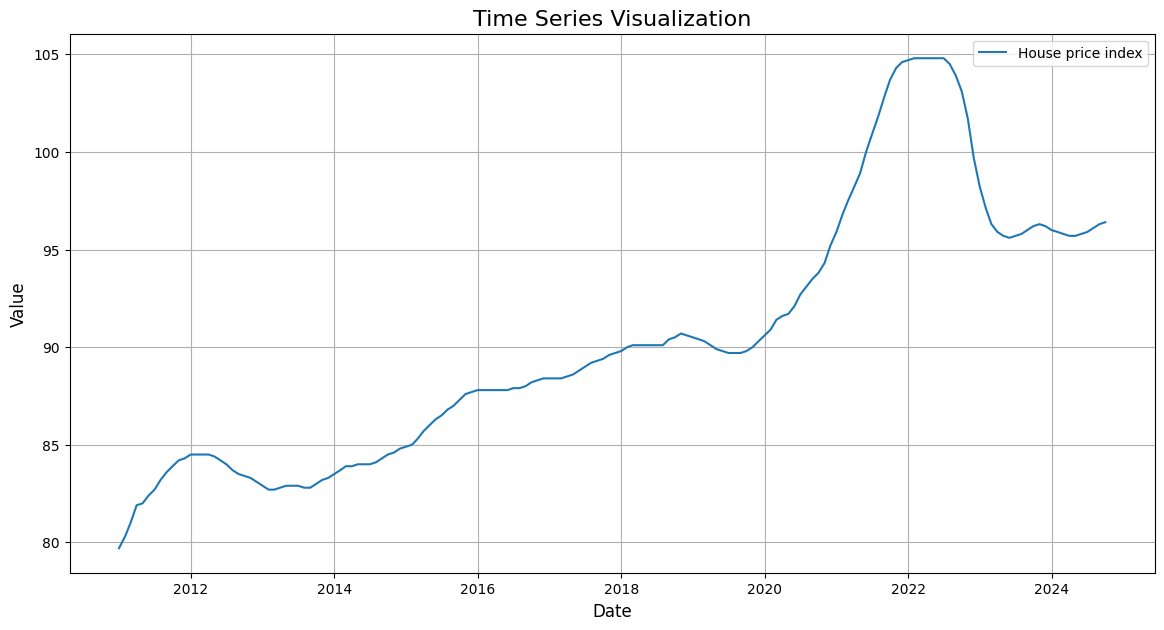

In [ ]:
# 그래프 시각화
plt.figure(figsize=(14, 7))

# 각 컬럼을 Date를 기준으로 선 그래프로 표시
for column in df5.columns[1:]:  # Date를 제외한 나머지 컬럼
    plt.plot(df5['Date'], df5[column], label=column)

# 그래프 제목 및 축 설정
plt.title('Time Series Visualization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
# 건설업 취업자
file_path6 = '/content/drive/MyDrive/201101-202410산업별_취업자_20241206161106.csv'  # 파일 경로 지정
df6 = pd.read_csv(file_path6,encoding='euc-kr')
df6.head()

,시점,F 건설업(41~42)
0,2024.10,2061
1,2024.09,2057
2,2024.08,2042
3,2024.07,2014
4,2024.06,2057


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시점            166 non-null    float64
 1   F 건설업(41~42)  166 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


In [ ]:
# 컬럼 이름을 영어로 변경
df6.columns = ['Date','construction industry workers']
# 'Date' 컬럼을 문자열로 변환
df6['Date'] = df6['Date'].astype(str)
# 2024.1 -> 2024.10 으로 (필요한 경우에만)
df6['Date'] = df6['Date'].apply(lambda x: x.split('.')[0] + '.10' if len(x.split('.')) > 1 and x.split('.')[1] == '1' else x)
# 'Date' 컬럼을 datetime 형식으로 변환
df6['Date'] = pd.to_datetime(df6['Date'], format='%Y.%m', errors='coerce')
# float 변경
df6['construction industry workers'] = df6['construction industry workers'].astype(float)
# 결과 출력
print(df6.head())
print(df6.info())

        Date  construction industry workers
0 2024-10-01                         2061.0
1 2024-09-01                         2057.0
2 2024-08-01                         2042.0
3 2024-07-01                         2014.0
4 2024-06-01                         2057.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           166 non-null    datetime64[ns]
 1   construction industry workers  166 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB
None


In [ ]:
df6.isnull().sum()

,0
Date,0
construction industry workers,0


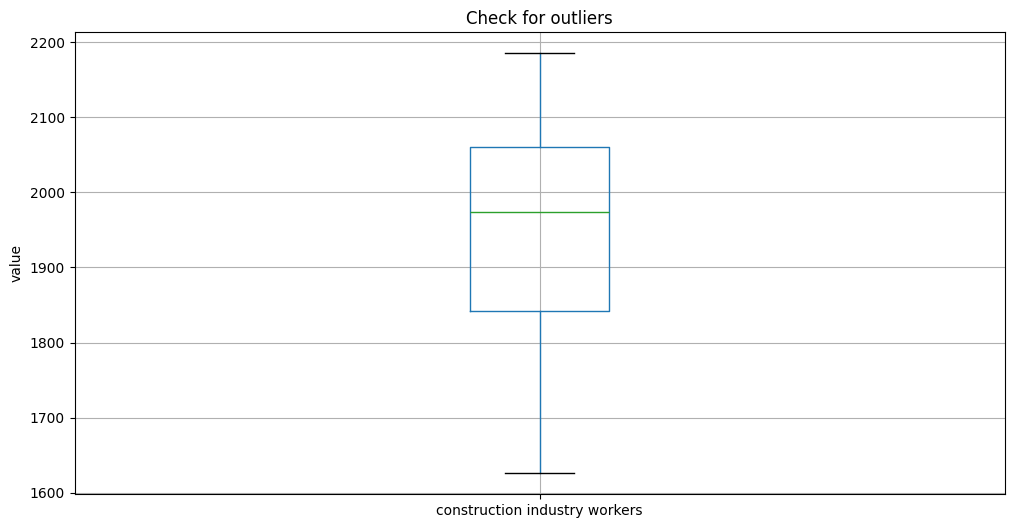

In [ ]:
# 이상치 그래프 그리기
plt.figure(figsize=(12, 6))
df6.drop(columns=["Date"]).boxplot()
plt.title("Check for outliers")
plt.ylabel("value")
plt.show()

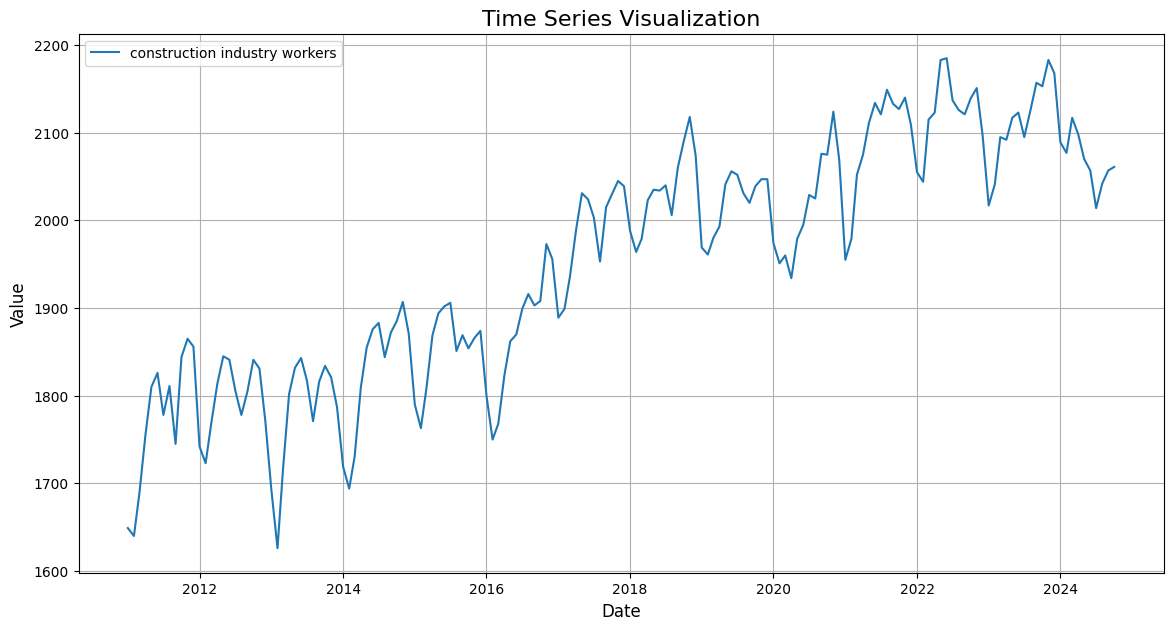

In [ ]:
# 그래프 시각화
plt.figure(figsize=(14, 7))

# 각 컬럼을 Date를 기준으로 선 그래프로 표시
for column in df6.columns[1:]:  # Date를 제외한 나머지 컬럼
    plt.plot(df6['Date'], df6[column], label=column)

# 그래프 제목 및 축 설정
plt.title('Time Series Visualization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
# 철광 가격
!pip install requests
import requests
import pandas as pd
# API 호출에 필요한 정보 설정
url = "https://api.odcloud.kr/api/3039951/v1/uddi:b6699de8-3b19-4ab7-8ed7-894636ad6c6d_202004071625?page=1&perPage=1000&serviceKey=v3VB96%2FVYCcYqOC7r6zKKDuD9RMC8qfoPhAqnvZe9ZBZoJ8udDDsvmWzQLPXqXJscDvi7cLhH41FlgprmDEDgQ%3D%3D"

data=requests.get(url).json()
df7 = pd.DataFrame(data["data"])

# 데이터 확인
print(df7)
df7.info()

          기간  냉연(천원_톤)  열연(천원_톤)  유연탄(달러_톤)  철광석(달러_톤)  철근(천원_톤)  철스크랩(달러_톤)  \
0    2024-10       900       788        211        104       754         316   
1    2024-09       930       793        194         95       804         308   
2    2024-08       958       806        207         99       774         310   
3    2024-07       985       805        239        106       716         310   
4    2024-06      1013       820        246        107       679         315   
..       ...       ...       ...        ...        ...       ...         ...   
155  2011-11      1100       830        198        137       812         371   
156  2011-10      1108       890        226        151       824         399   
157  2011-09      1114       900        245        178       805         411   
158  2011-08      1090       900        252        179       803         412   
159  2011-07      1180       908        267        175       775         413   

     철스크랩(엔_톤)  후판(천원_톤)  
0        369

In [ ]:
# 잘 안 쓰이거나 겹치는 열 살제
df7 = df7.drop(df7.columns[[3,4,6,7,8]], axis=1)
# 컬럼 이름을 영어로 변경
df7 = df7.rename(columns={'기간':'Date',
                          '냉연(천원_톤)': 'ColdRoll_KRW_Ton',
                          '열연(천원_톤)': 'HotRoll_KRW_Ton',
                          '철근(천원_톤)': 'Rebar_KRW_Ton'})
# 'Date' 컬럼을 datetime 형식으로 변환
df7['Date'] = pd.to_datetime(df7['Date'], format='%Y-%m', errors='coerce')

In [ ]:
# 모든 수치형 데이터를 float로 변환
for col in df7.columns[1:]:
    df7[col] = df7[col].astype(float)

# 결과 확인
print(df7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              160 non-null    datetime64[ns]
 1   ColdRoll_KRW_Ton  160 non-null    float64       
 2   HotRoll_KRW_Ton   160 non-null    float64       
 3   Rebar_KRW_Ton     160 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.1 KB
None


In [ ]:
# 결측치 확인
df7.isnull().sum()

,0
Date,0
ColdRoll_KRW_Ton,0
HotRoll_KRW_Ton,0
Rebar_KRW_Ton,0


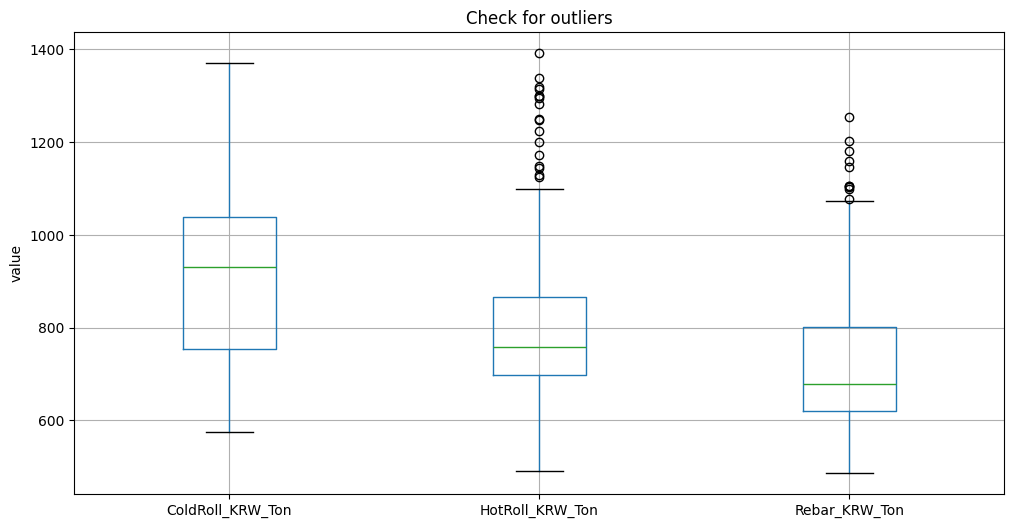

In [ ]:
 # 이상치 그래프 그리기
plt.figure(figsize=(12, 6))
df7.drop(columns=["Date"]).boxplot()
plt.title("Check for outliers")
plt.ylabel("value")
plt.show()

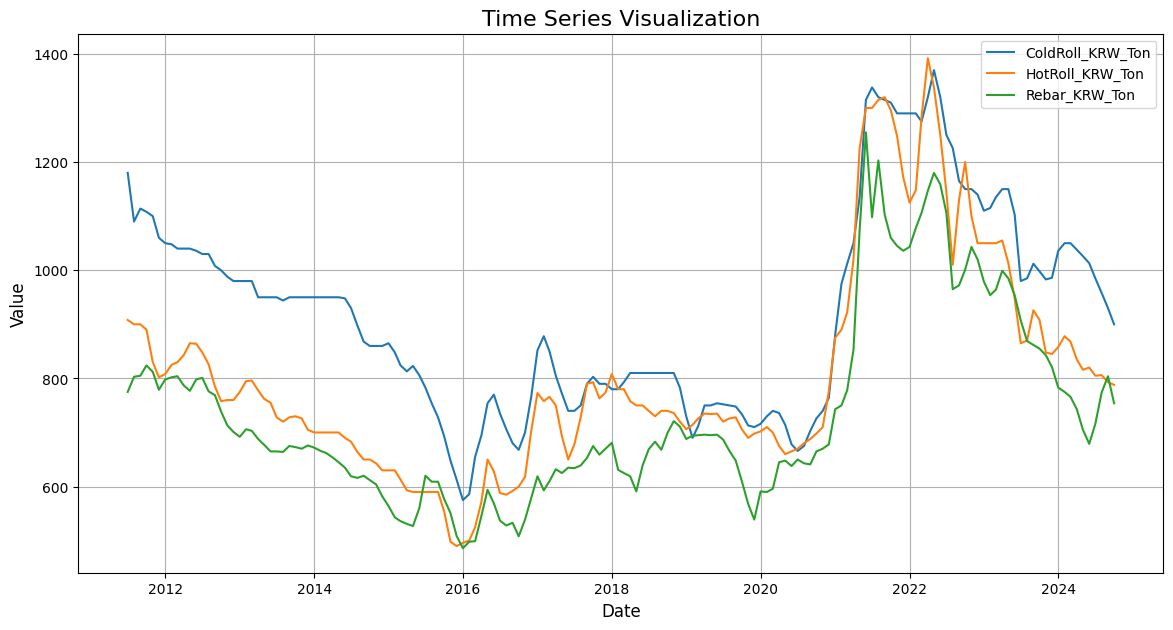

In [ ]:
# 그래프 시각화
plt.figure(figsize=(14, 7))

# 각 컬럼을 Date를 기준으로 선 그래프로 표시
for column in df7.columns[1:]:  # Date를 제외한 나머지 컬럼
    plt.plot(df7['Date'], df7[column], label=column)

# 그래프 제목 및 축 설정
plt.title('Time Series Visualization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

In [ ]:
!pip install finance-datareader

In [ ]:
!pip install finance-datareader
import FinanceDataReader as fdr

# 데이터 가져오기
start_date = '2011-07-01'
end_date = '2024-09-30'

# 코스피 데이터 가져오기 (KOSPI 지수)
kospi = fdr.DataReader('KS11', start=start_date, end=end_date)
# Date와 Close 열만 사용
kospi = kospi.reset_index()[['Date', 'Close']]
kospi['Date'] = pd.to_datetime(kospi['Date'])  # Date 열을 datetime 형식으로 변환
kospi.set_index('Date', inplace=True)  # Date 열을 인덱스로 설정

# 현대건설 데이터 가져오기
hyundai_const = fdr.DataReader('000720', start=start_date, end=end_date)
# Date와 Close 열만 사용
hyundai_const = hyundai_const.reset_index()[['Date', 'Close']]
hyundai_const['Date'] = pd.to_datetime(hyundai_const['Date'])  # Date 열을 datetime 형식으로 변환
hyundai_const.set_index('Date', inplace=True)  # Date 열을 인덱스로 설정

# 월별 평균 계산 (MS: Month Start)
df8 = kospi.resample("MS").mean()
df9 = hyundai_const.resample("MS").mean()
# 컬럼명 변경
df8.rename(columns={'Close': 'kospi close'}, inplace=True)
df9.rename(columns={'Close': 'hyundai_const close'}, inplace=True)

# 결과 확인
print(df8.head())
print(df9.head())

            kospi close
Date                   
2011-07-01  2150.056190
2011-08-01  1869.407727
2011-09-01  1790.949500
2011-10-01  1825.878000
2011-11-01  1858.795455
            hyundai_const close
Date                           
2011-07-01         85218.523810
2011-08-01         68276.181818
2011-09-01         59896.200000
2011-10-01         63452.500000
2011-11-01         64835.409091


In [ ]:
# 결측치 확인
print(df8.isnull().sum())
print(df9.isnull().sum())

kospi close    0
dtype: int64
hyundai_const close    0
dtype: int64


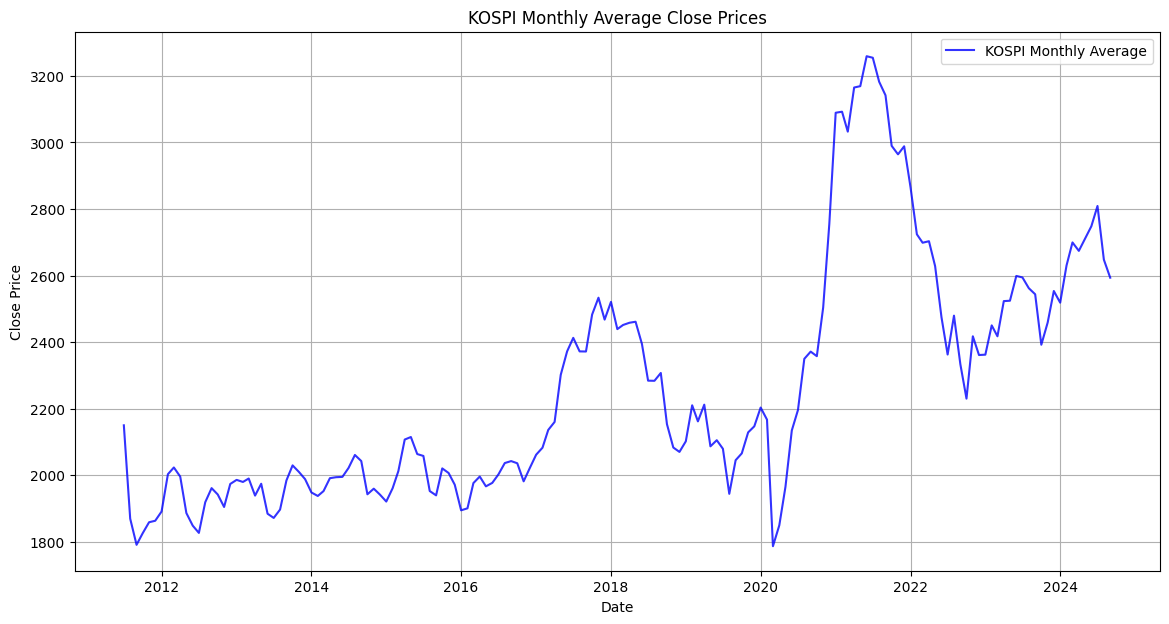

In [ ]:
# df8 (코스피 월별 평균) 시각화
plt.figure(figsize=(14, 7))
plt.plot(df8.index, df8['kospi close'], label='KOSPI Monthly Average', color='blue', alpha=0.8)
plt.title('KOSPI Monthly Average Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

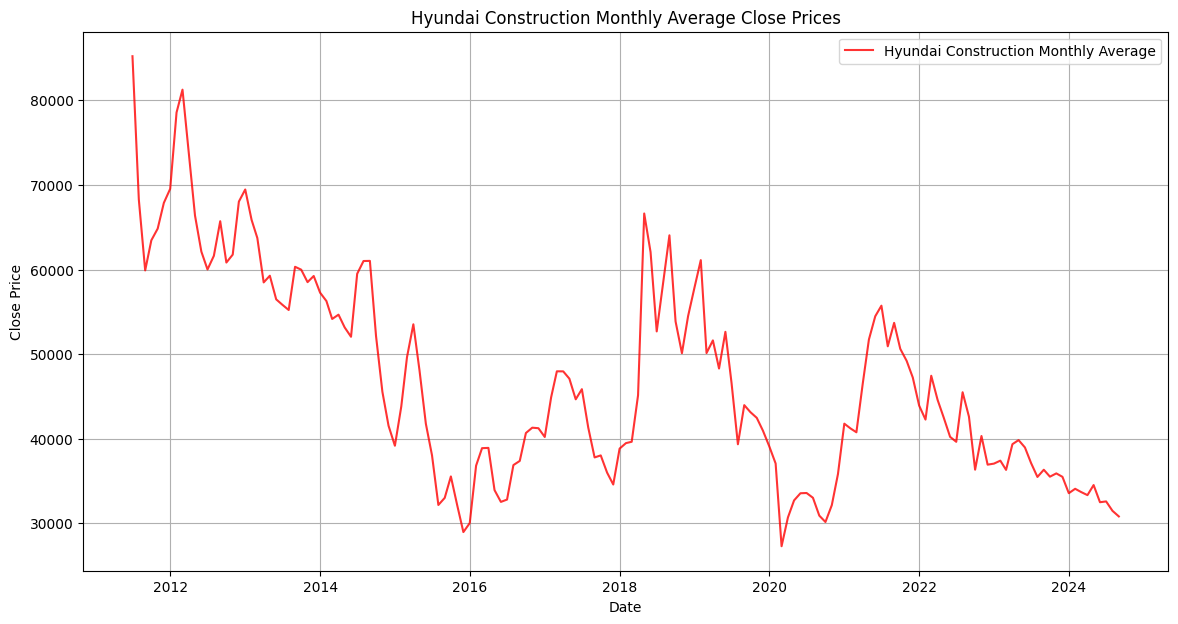

In [ ]:
# 현대건설 월별 평균 시각화
plt.figure(figsize=(14, 7))
plt.plot(df9.index, df9['hyundai_const close'], label='Hyundai Construction Monthly Average', color='red', alpha=0.8)
plt.title('Hyundai Construction Monthly Average Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 건설금리
file_path10 = '/content/drive/MyDrive/201101-202409시장금리(월,분기,년)_08180027.csv'  # 파일 경로 지정
df10 = pd.read_csv(file_path10,encoding=' utf-8')

# 컬럼 이름을 영어로 변경
df10 = df10.rename(columns={'변환':'Date',
                            '원자료':'CP'})

In [ ]:
# 'Date' 컬럼을 문자열로 변환
df10['Date'] = df10['Date'].astype(str)
# 'Date' 컬럼을 datetime 형식으로 변환
df10['Date'] = pd.to_datetime(df10['Date'], format='%Y/%m', errors='coerce')
print(df10.head())
print(df10.info())

        Date    CP
0 2011-01-01  2.93
1 2011-02-01  3.13
2 2011-03-01  3.35
3 2011-04-01  3.40
4 2011-05-01  3.46
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    165 non-null    datetime64[ns]
 1   CP      165 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 KB
None


In [ ]:
df10.isnull().sum()

,0
Date,0
CP,0


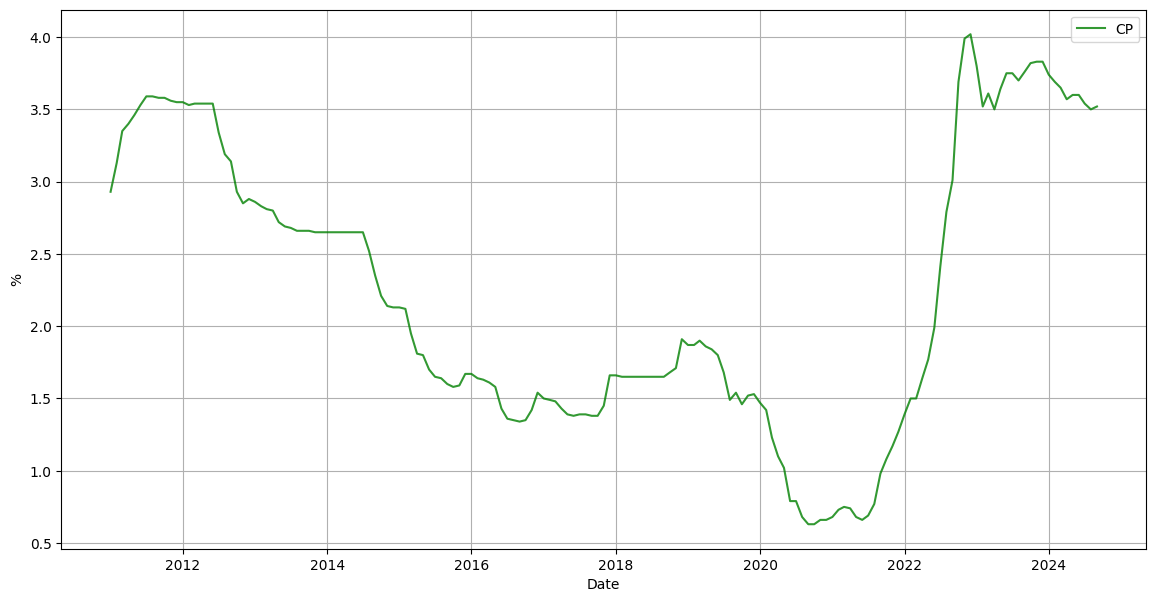

In [ ]:
# CP금리 시각화
plt.figure(figsize=(14, 7))
plt.plot(df10['Date'], df10['CP'], label='CP', color='green', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('%')
plt.legend()
plt.grid()
plt.show()

In [ ]:
df1 = df1.sort_values(by='Date', ascending=True)
df2 = df2.sort_values(by='Date', ascending=True)
df3 = df3.sort_values(by='Date', ascending=True)
df4 = df4.sort_values(by='Date', ascending=True)
df5 = df5.sort_values(by='Date', ascending=True)
df6 = df6.sort_values(by='Date', ascending=True)
df7 = df7.sort_values(by='Date', ascending=True)
df10 = df10.sort_values(by='Date', ascending=True)

In [ ]:
start_date = '2011-07-01'
end_date = '2024-09-01'

# 각 데이터프레임에서 Date를 2011-07-01부터 2024-09-01 사이로 제한
df1 = df1[(df1['Date'] >= start_date) & (df1['Date'] <= end_date)]
df2 = df2[(df2['Date'] >= start_date) & (df2['Date'] <= end_date)]
df3 = df3[(df3['Date'] >= start_date) & (df3['Date'] <= end_date)]
df4 = df4[(df4['Date'] >= start_date) & (df4['Date'] <= end_date)]
df5 = df5[(df5['Date'] >= start_date) & (df5['Date'] <= end_date)]
df6 = df6[(df6['Date'] >= start_date) & (df6['Date'] <= end_date)]
df7 = df7[(df7['Date'] >= start_date) & (df7['Date'] <= end_date)]
df10 = df10[(df10['Date'] >= start_date) & (df10['Date'] <= end_date)]

In [ ]:
merged_df = df1
for df in [df2, df3, df4, df5, df6,df7,df8,df9,df10]:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer')

In [ ]:
# 'Date' 기준으로 오름차순 정렬
merged_df = merged_df.sort_values(by='Date', ascending=True)

# 결과 출력
merged_df.head()

,Date,Const_Comp,Pub_Comp,Priv_Comp,Total_Ord,Pub_Const_Ord,Pub_Civil_Ord,Priv_Const_Ord,Priv_Civil_Ord,Sect,...,Pipe,Apartment price index,House price index,construction industry workers,ColdRoll_KRW_Ton,HotRoll_KRW_Ton,Rebar_KRW_Ton,kospi close,hyundai_const close,CP
0,2011-07-01,6753924.0,2378256.0,4060850.0,5156656.0,394260.0,1461190.0,1946546.0,1147496.0,391.0,...,389.0,84.2,82.7,1778.0,1180.0,908.0,775.0,2150.056190,85218.523810,3.59
1,2011-08-01,6896321.0,2460625.0,4098699.0,7573537.0,482694.0,1021347.0,4755455.0,1027549.0,378.0,...,361.0,84.9,83.2,1811.0,1090.0,900.0,803.0,1869.407727,68276.181818,3.59
2,2011-09-01,7772387.0,2844828.0,4437365.0,7714215.0,2281619.0,1070240.0,3306174.0,687349.0,366.0,...,419.0,85.5,83.6,1745.0,1114.0,900.0,805.0,1790.949500,59896.200000,3.58
3,2011-10-01,7961152.0,2901780.0,4671649.0,7491015.0,728556.0,1586854.0,4444616.0,546620.0,449.0,...,446.0,85.5,83.9,1844.0,1108.0,890.0,824.0,1825.878000,63452.500000,3.58
4,2011-11-01,7859374.0,3170555.0,4291693.0,9038877.0,1240302.0,1748397.0,4970179.0,900063.0,425.0,...,445.0,85.0,84.2,1865.0,1100.0,830.0,812.0,1858.795455,64835.409091,3.56


In [ ]:
merged_df.isnull().sum()

,0
Date,0
Const_Comp,0
Pub_Comp,0
Priv_Comp,0
Total_Ord,0
Pub_Const_Ord,0
Pub_Civil_Ord,0
Priv_Const_Ord,0
Priv_Civil_Ord,0
Sect,0


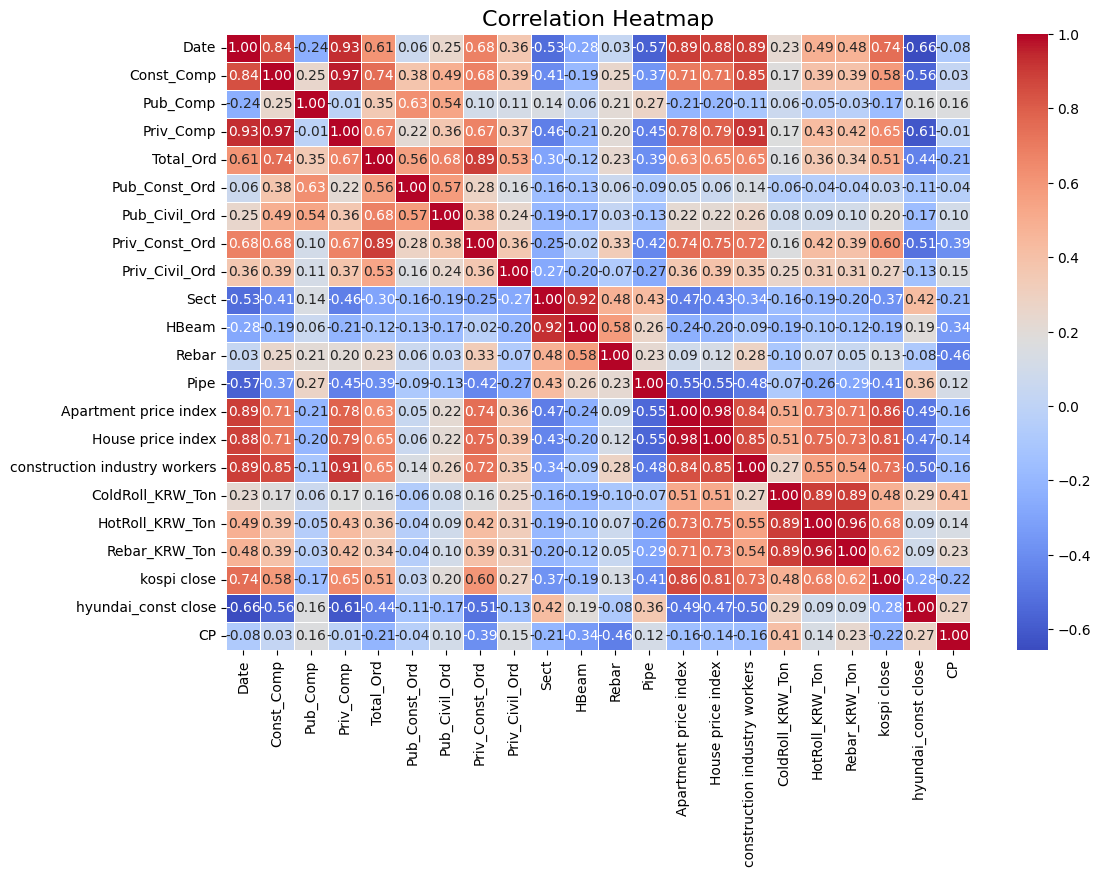

In [ ]:
import seaborn as sns

# 상관관계 분석
correlation_matrix = merged_df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [ ]:
# 상관관계수가 낮은 데이터 분석 & 중복되는 정보와 모든 변수와 상관관계가 없거나 매우 낮은 변수들을 제거하고 분석 진행()
columns = ["Date", "Const_Comp", "Rebar",
                   "Apartment price index", "construction industry workers", "Rebar_KRW_Ton",
                   "kospi close", "hyundai_const close"]

# 필요한 컬럼만 유지
final_df =merged_df[columns]

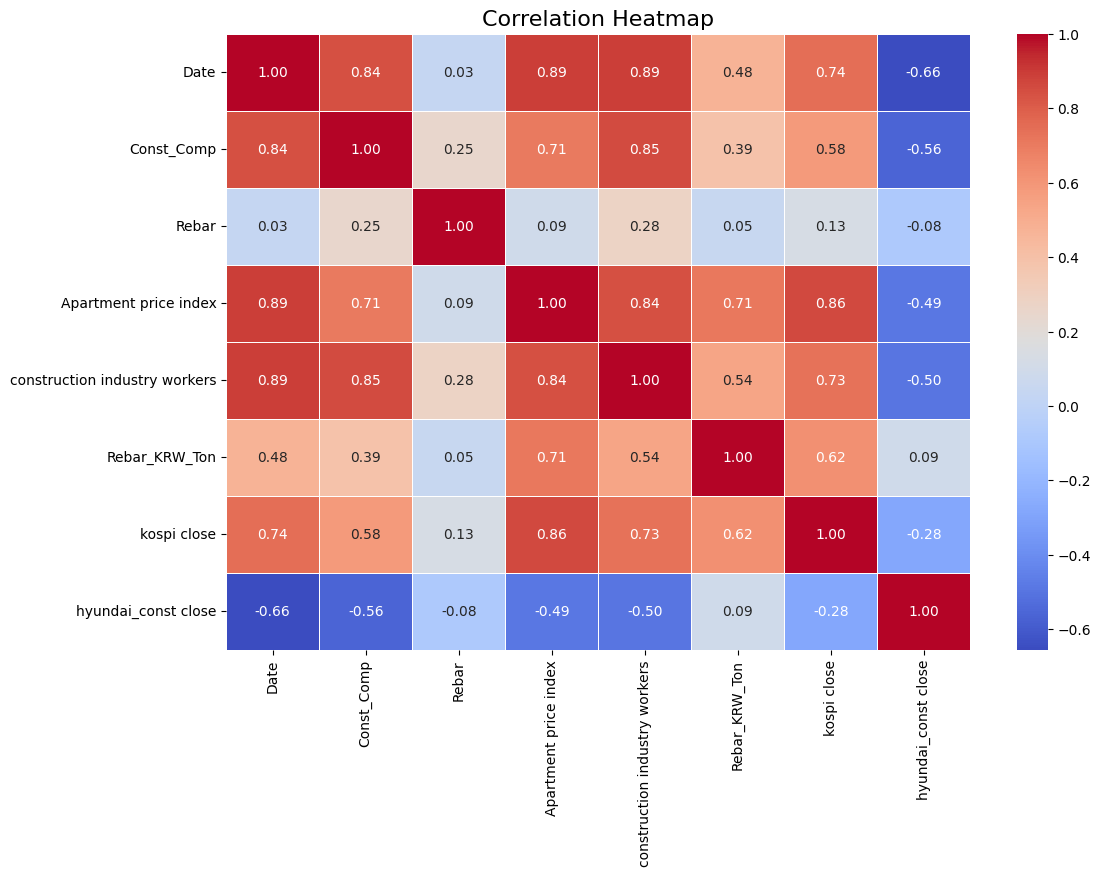

In [ ]:
# 상관관계 분석
correlation_mat = final_df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_mat, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [ ]:
# 상관관계 데이터프레임 생성 (Date 열 제거)
correlation_mat = final_df.drop(columns=['Date']).corr()

# 상관계수 조건에 맞는 쌍 찾기 (-0.1~ 0.1)
selected_pairs = []

for i in range(len(correlation_mat)):
    for j in range(i + 1, len(correlation_mat.columns)):
        value = correlation_mat.iloc[i, j]
        if -0.1 <= value < 0.1:
            selected_pairs.append((correlation_mat.index[i], correlation_mat.columns[j], value))

# 결과 출력
for pair in selected_pairs:
    print(f"Feature 1: {pair[0]}, Feature 2: {pair[1]}, Correlation: {pair[2]:.2f}")


Feature 1: Rebar, Feature 2: Apartment price index, Correlation: 0.09
Feature 1: Rebar, Feature 2: Rebar_KRW_Ton, Correlation: 0.05
Feature 1: Rebar, Feature 2: hyundai_const close, Correlation: -0.08
Feature 1: Rebar_KRW_Ton, Feature 2: hyundai_const close, Correlation: 0.09


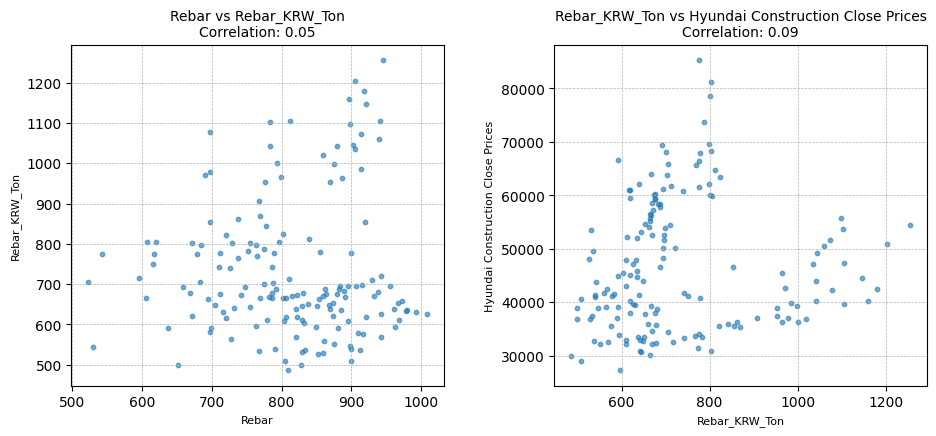

In [ ]:
# 다중 플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열 레이아웃
axes = axes.flatten()

# 공통 스타일 설정
font_title = 10
font_label = 8

# 첫 번째 플롯
axes[0].scatter(final_df['Rebar'], final_df['Rebar_KRW_Ton'], alpha=0.6, s=10)
axes[0].set_title("Rebar vs Rebar_KRW_Ton\nCorrelation: 0.05", fontsize=font_title)
axes[0].set_xlabel("Rebar", fontsize=font_label)
axes[0].set_ylabel("Rebar_KRW_Ton", fontsize=font_label)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# 두 번째 플롯
axes[1].scatter(final_df['Rebar_KRW_Ton'], final_df['hyundai_const close'], alpha=0.6, s=10)
axes[1].set_title("Rebar_KRW_Ton vs Hyundai Construction Close Prices\nCorrelation: 0.09", fontsize=font_title)
axes[1].set_xlabel("Rebar_KRW_Ton", fontsize=font_label)
axes[1].set_ylabel("Hyundai Construction Close Prices", fontsize=font_label)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# 레이아웃 조정 및 플롯 표시
plt.tight_layout(pad=3)
plt.show()


In [ ]:
# 상관관계 데이터프레임 생성 (Date 열 제거)
correlation_mat = final_df.drop(columns=['Date']).corr()

# 상관계수 조건에 맞는 쌍 찾기 (0.7 이상)
selected_pairs = []

for i in range(len(correlation_mat)):
    for j in range(i + 1, len(correlation_mat.columns)):
        value = correlation_mat.iloc[i, j]
        if value >= 0.7:  # 조건: 0.7 이상
            selected_pairs.append((correlation_mat.index[i], correlation_mat.columns[j], value))

# 결과 출력
for pair in selected_pairs:
    print(f"Feature 1: {pair[0]}, Feature 2: {pair[1]}, Correlation: {pair[2]:.2f}")

Feature 1: Const_Comp, Feature 2: Apartment price index, Correlation: 0.71
Feature 1: Const_Comp, Feature 2: construction industry workers, Correlation: 0.85
Feature 1: Apartment price index, Feature 2: construction industry workers, Correlation: 0.84
Feature 1: Apartment price index, Feature 2: Rebar_KRW_Ton, Correlation: 0.71
Feature 1: Apartment price index, Feature 2: kospi close, Correlation: 0.86
Feature 1: construction industry workers, Feature 2: kospi close, Correlation: 0.73


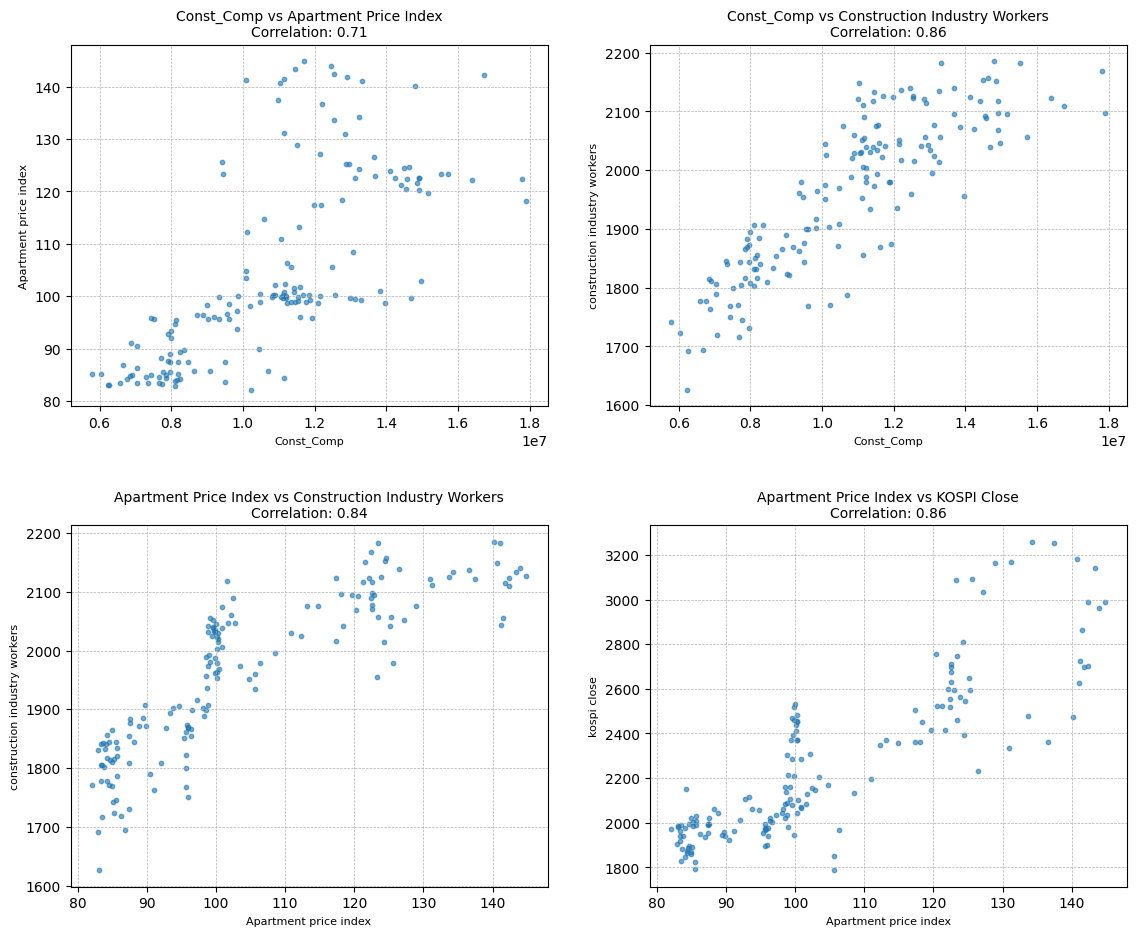

In [ ]:
# 다중 플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2행 2열 레이아웃
axes = axes.flatten()

# 공통 스타일 설정
font_title = 10
font_label = 8

# 데이터와 상관관계 정의
plot_data = [{"x": "Const_Comp","y": "Apartment price index","title": "Const_Comp vs Apartment Price Index","correlation": 0.71,},
 {"x": "Const_Comp","y": "construction industry workers","title": "Const_Comp vs Construction Industry Workers","correlation": 0.85,},
  {"x": "Apartment price index","y": "construction industry workers","title": "Apartment Price Index vs Construction Industry Workers","correlation": 0.84,},
   {"x": "Apartment price index","y": "kospi close","title": "Apartment Price Index vs KOSPI Close","correlation": 0.86,},]

# 플롯 생성 루프
for i, data in enumerate(plot_data):
    axes[i].scatter(final_df[data["x"]], final_df[data["y"]], alpha=0.6, s=10)
    axes[i].set_title(f"{data['title']}\nCorrelation: {data['correlation']:.2f}", fontsize=font_title)
    axes[i].set_xlabel(data["x"], fontsize=font_label)
    axes[i].set_ylabel(data["y"], fontsize=font_label)
    axes[i].grid(True, linestyle="--", linewidth=0.5)

# 레이아웃 조정 및 플롯 표시
plt.tight_layout(pad=3)
plt.show()


In [ ]:
# 상관관계 데이터프레임 생성 (Date 열 제거)
correlation_mat = final_df.drop(columns=['Date']).corr()

# 상관계수 조건에 맞는 쌍 찾기 (-0.7 ~ -0.3)
selected_pairs = []

for i in range(len(correlation_mat)):
    for j in range(i + 1, len(correlation_mat.columns)):
        value = correlation_mat.iloc[i, j]
        if -0.7 <= value < -0.3:  # 조건: -0.7 이상 -0.3 미만
            selected_pairs.append((correlation_mat.index[i], correlation_mat.columns[j], value))

# 결과 출력
for pair in selected_pairs:
    print(f"Feature 1: {pair[0]}, Feature 2: {pair[1]}, Correlation: {pair[2]:.2f}")


Feature 1: Const_Comp, Feature 2: hyundai_const close, Correlation: -0.56
Feature 1: Apartment price index, Feature 2: hyundai_const close, Correlation: -0.49
Feature 1: construction industry workers, Feature 2: hyundai_const close, Correlation: -0.50


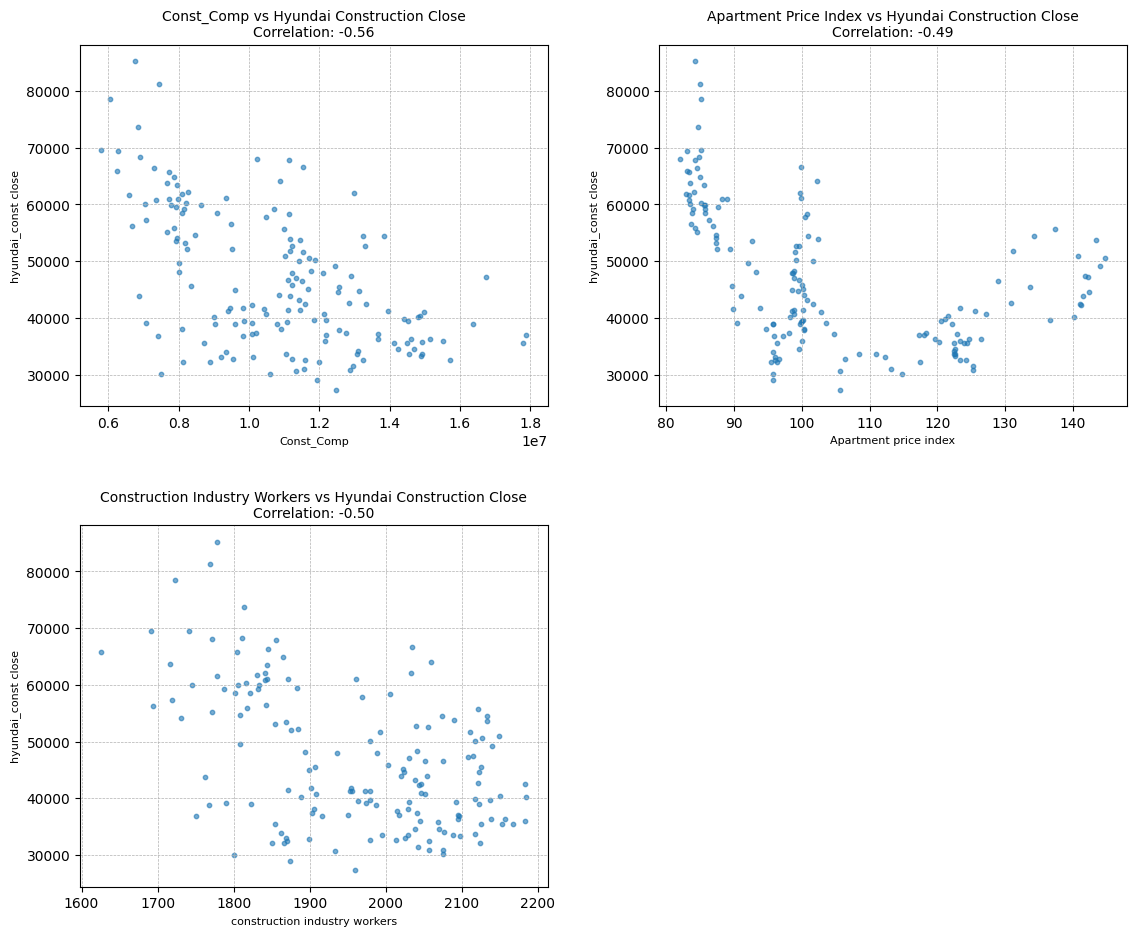

In [ ]:
# 다중 플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2행 2열 레이아웃
axes = axes.flatten()

# 공통 스타일 설정
font_title = 10
font_label = 8

# 데이터와 상관관계 정의
plot_data = [
    {"x": "Const_Comp", "y": "hyundai_const close", "title": "Const_Comp vs Hyundai Construction Close", "correlation": -0.56},
    {"x": "Apartment price index", "y": "hyundai_const close", "title": "Apartment Price Index vs Hyundai Construction Close", "correlation": -0.49},
    {"x": "construction industry workers", "y": "hyundai_const close", "title": "Construction Industry Workers vs Hyundai Construction Close", "correlation": -0.50}
]

# 산점도 생성 루프
for i in range(4):  # 총 4개의 플롯 공간
    if i < len(plot_data):  # 데이터가 있는 경우
        data = plot_data[i]
        axes[i].scatter(final_df[data["x"]], final_df[data["y"]], alpha=0.6, s=10)
        axes[i].set_title(f"{data['title']}\nCorrelation: {data['correlation']:.2f}", fontsize=font_title)
        axes[i].set_xlabel(data["x"], fontsize=font_label)
        axes[i].set_ylabel(data["y"], fontsize=font_label)
        axes[i].grid(True, linestyle="--", linewidth=0.5)
    else:  # 남는 플롯 공간 비활성화
        axes[i].axis("off")

# 레이아웃 조정 및 플롯 표시
plt.tight_layout(pad=3)
plt.show()


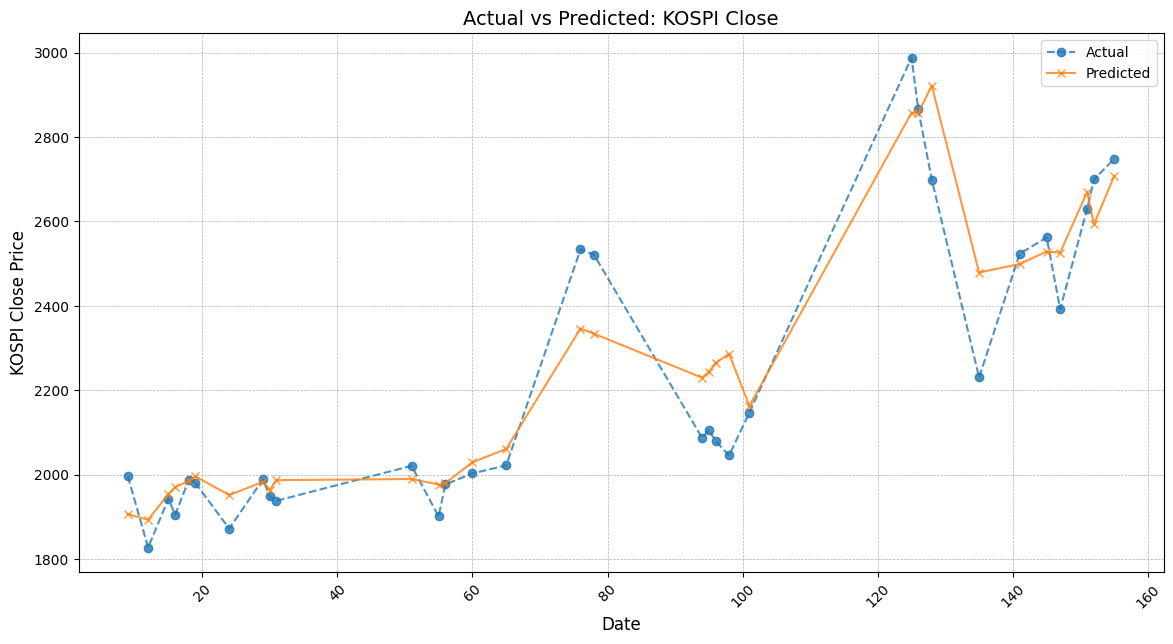

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 독립 변수와 종속 변수 설정
X = final_df.drop(columns=["kospi close", "Date"])
y = final_df["kospi close"]

# 데이터 분리 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트 회귀 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 예측 수행
y_pred = rf_model.predict(X_test)

# 실제 값과 예측 값 비교
results_df = pd.DataFrame({
    "Date": X_test.index,  # 테스트 데이터 인덱스를 날짜로 사용
    "Actual": y_test.values,
    "Predicted": y_pred
}).sort_values(by="Date")  # 날짜 순으로 정렬

# 실제 값 vs 예측 값 시각화
plt.figure(figsize=(14, 7))
plt.plot(results_df["Date"], results_df["Actual"], label="Actual", linestyle="--", marker="o", alpha=0.8)
plt.plot(results_df["Date"], results_df["Predicted"], label="Predicted", linestyle="-", marker="x", alpha=0.8)
plt.title("Actual vs Predicted: KOSPI Close", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("KOSPI Close Price", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 111.83
Mean Absolute Error (MAE): 83.15
R² Score: 0.89


Features sorted by Gini Importance:
                         Feature  Gini Importance
2          Apartment price index         0.676061
3  construction industry workers         0.126546
5            hyundai_const close         0.094215
0                     Const_Comp         0.060258
4                  Rebar_KRW_Ton         0.024718
1                          Rebar         0.018202


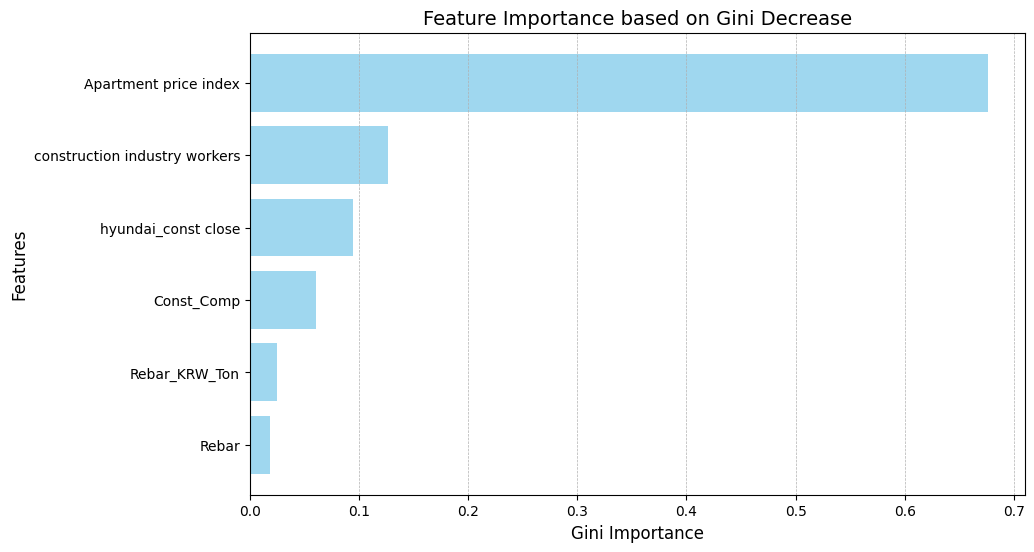

In [ ]:
# 지니 지수 감소량 계산
feature_importances = rf_model.feature_importances_

# 중요도 결과 정리
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Gini Importance": feature_importances
}).sort_values(by="Gini Importance", ascending=False)

# 출력
print("Features sorted by Gini Importance:")
print(importance_df)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Gini Importance"], color="skyblue", alpha=0.8)
plt.xlabel("Gini Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance based on Gini Decrease", fontsize=14)
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.gca().invert_yaxis()
plt.show()

Top 2 Features: ['Apartment price index', 'construction industry workers']


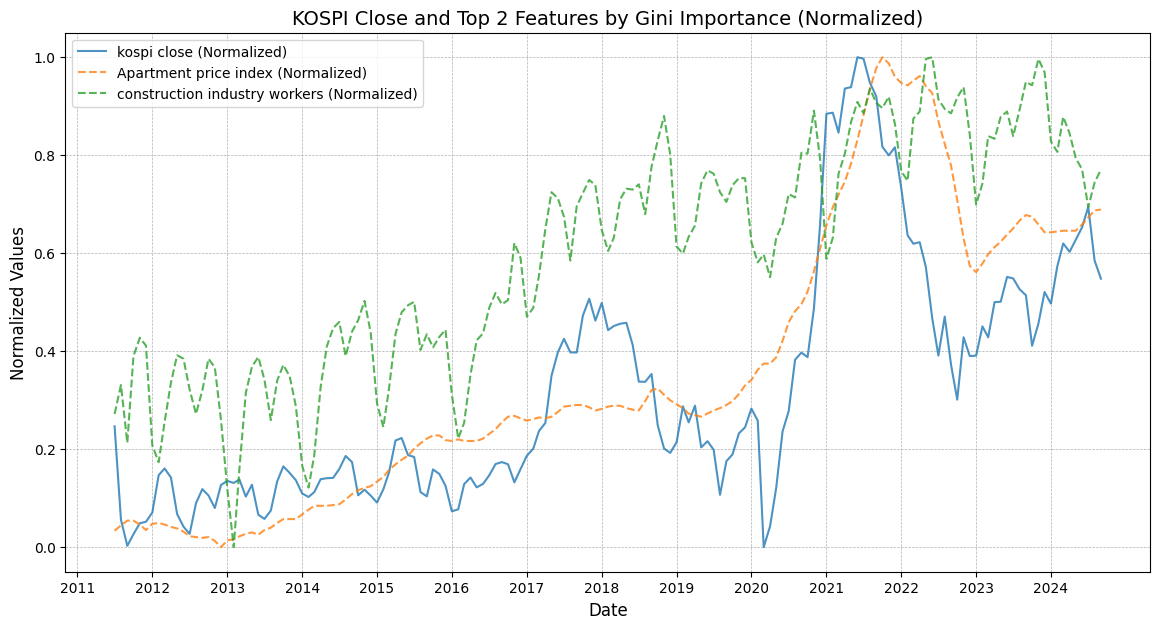

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 중요도 데이터프레임 및 상위 2개 변수 추출
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Gini Importance": rf_model.feature_importances_
}).sort_values(by="Gini Importance", ascending=False)

top_features = importance_df.iloc[:2]["Feature"].tolist()  # 상위 2개 변수
print(f"Top 2 Features: {top_features}")

# 정규화 수행
scaler = MinMaxScaler()
selected_columns = ["kospi close"] + top_features
normalized_df = pd.DataFrame(
    scaler.fit_transform(final_df[selected_columns]),
    columns=selected_columns
)
normalized_df["Date"] = final_df["Date"]

# 그래프 생성 및 설정
plt.figure(figsize=(14, 7))
for feature in ["kospi close"] + top_features:
    linestyle = "--" if feature != "kospi close" else "-"
    plt.plot(normalized_df["Date"], normalized_df[feature], label=f"{feature} (Normalized)", linestyle=linestyle, alpha=0.8)

plt.title("KOSPI Close and Top 2 Features by Gini Importance (Normalized)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Values", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

# x축 레이블을 연도별로 수정
plt.xticks(
    ticks=pd.date_range(start="2011-01-01", end="2024-01-01", freq="YS"),
    labels=pd.date_range(start="2011-01-01", end="2024-01-01", freq="YS").strftime('%Y')
)

plt.show()
